In [1]:
## XGBoost 
# State 1 hot 
# Rurality Data
# SVI poverty index
# Minority?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import xgboost as xgb 
import shap
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import pairwise
from sklearn.model_selection import cross_val_score
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
main_path = Path.cwd()
data_path = main_path / 'Data'

#svi = pd.read_csv( data_path / 'Master Project Data' /'SVI Tract Data.csv',  )


In [3]:
# import stored methods 
path = Path.cwd()
main_path = Path.cwd()
data_path = main_path / 'Data'
from src.data import DataLoaders

ACS =  DataLoaders.ACSData(2016,'block_group')
ARC =  DataLoaders.ARCPData()

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


In [4]:
ACS = ACS.data
ACS

,inc_pct_poverty,race_pct_white,race_pct_whitenh,race_pct_nonwhite,race_pct_nonwhitenh,race_pct_black,race_pct_amind,race_pct_asian,race_pct_napi,race_pct_other,...,house_yr_pct_before_1960,house_yr_pct_after_2000,house_yr_pct_1960_2000,house_val_less_50K,house_val_50_100K,house_val_100K_300K,house_val_300K_500K,house_val_more_500K,race_pct_black_or_amind,pct_alt_heat
GEOID,,,,,,,,,,,,,,,,,,,,,
010010201001,0.191946,0.785235,0.763758,0.214765,0.236242,0.214765,0.000000,0.000000,0.000000,0.000000,...,0.221831,0.193662,0.584507,0.152047,0.274854,0.508772,0.064327,0.000000,0.214765,0.017606
010010201002,0.044269,0.856126,0.826877,0.143874,0.173123,0.082213,0.000000,0.007115,0.000000,0.000000,...,0.079229,0.085653,0.835118,0.100264,0.153034,0.538259,0.174142,0.034301,0.082213,0.032895
010010202001,0.382199,0.376042,0.376042,0.623958,0.623958,0.591667,0.000000,0.000000,0.013542,0.000000,...,0.135678,0.211055,0.653266,0.171053,0.337719,0.394737,0.065789,0.030702,0.591667,0.000000
010010202002,0.111426,0.497573,0.488673,0.502427,0.511327,0.461974,0.000000,0.019417,0.000000,0.008091,...,0.235772,0.075203,0.689024,0.053691,0.513423,0.412752,0.020134,0.000000,0.461974,0.019912
010010203001,0.042301,0.626481,0.626481,0.373519,0.373519,0.217851,0.009306,0.011421,0.002538,0.096447,...,0.030303,0.091887,0.877810,0.057522,0.349558,0.592920,0.000000,0.000000,0.227157,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560459511001,0.094029,0.950583,0.929307,0.049417,0.070693,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.308305,0.121729,0.569966,0.089320,0.114563,0.666019,0.091262,0.038835,0.000000,0.366569
560459511002,0.062579,0.935884,0.918642,0.064116,0.081358,0.009698,0.004849,0.044720,0.000000,0.000000,...,0.197500,0.337500,0.465000,0.123437,0.079687,0.525000,0.232812,0.039062,0.014547,0.825737
560459513001,0.261512,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.556757,0.000000,0.443243,0.229282,0.303867,0.466851,0.000000,0.000000,0.000000,0.105163


In [5]:
ARC = ARC.data
ARC

,geoid,census_block_group_y,census_block_group_x,city,state,zip,county,in_home_visit_date,smoke_alarms_installed__9_volt_10_year_dhh_,10_year_and_9_volt_alarms_installed,...,batteries_replaced,fire_escape_plans_made,fire_safety_checklists_completed,additional_hazard_education_conducted,additional_hazard_type,people_served,youth_served,seniors_served,veterans_military_members_and_military_family_members_served,individuals_with_disabilities_access_or_functional_needs_served
12,010010205002,32.470418,-86.424166,PRATTVILLE,AL,36066,Autauga,9/9/2016,1,1,...,0,1,1,0,None,2,0,0,0,0
18,010010208012,32.455173,-86.534590,PRATTVILLE,AL,36067,Autauga,9/30/2019,2,2,...,0,1,1,1,Tornadoes,5,0,0,1,0
23,010010208021,32.524822,-86.573009,PRATTVILLE,AL,36067,Autauga,5/4/2019,3,2,...,0,1,1,1,Other,1,0,0,0,0
24,010010208021,32.524822,-86.573009,PRATTVILLE,AL,36067,Autauga,9/27/2019,1,1,...,0,1,1,1,Tornadoes,1,0,0,0,0
27,010010208023,32.543983,-86.492100,PRATTVILLE,AL,36067,Autauga,12/2/2017,3,3,...,0,1,1,0,None,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862041,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,2,2,...,0,1,1,1,Wildfires,1,0,0,0,0
862042,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,3,3,...,0,1,1,1,Wildfires,4,2,0,0,0
862043,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,3,3,...,0,1,1,1,Wildfires,2,0,1,0,1
862044,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,4,4,...,0,1,1,1,Wildfires,3,0,0,0,0


In [6]:
ARC.columns

Index(['geoid', 'census_block_group_y', 'census_block_group_x', 'city',
       'state', 'zip', 'county', 'in_home_visit_date',
       'smoke_alarms_installed__9_volt_10_year_dhh_',
       '10_year_and_9_volt_alarms_installed', 'dhh_alarms_installed',
       'pre_existing_alarms', 'pre_existing_alarms_tested_and_working',
       'batteries_replaced', 'fire_escape_plans_made',
       'fire_safety_checklists_completed',
       'additional_hazard_education_conducted', 'additional_hazard_type',
       'people_served', 'youth_served', 'seniors_served',
       'veterans_military_members_and_military_family_members_served',
       'individuals_with_disabilities_access_or_functional_needs_served'],
      dtype='object')

In [7]:
# import stored methods 
#path = Path.cwd().parent.parent

#LoadAndCleanARCP = main_path /'src' /'data'/ 'LoadAndCleanARCP.py'
#LoadAndCleanACS = main_path /'src' /'data'/ 'LoadAndCleanACS.py'
# Run methods to obtain clean datasets 

#%run $LoadAndCleanARCP
#%run $LoadAndCleanACS

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


                   Pair Var 1                  Pair Var 2  Corr Value
150          denom_house_room              denom_house_yr         1.0
152          denom_house_room                 denom_plumb         1.0
173            denom_house_yr                 denom_kitch         1.0
172            denom_house_yr                 denom_plumb         1.0
206               denom_plumb                 denom_kitch         1.0
..                        ...                         ...         ...
138   house_pct_ownd_occupied     house_pct_rent_occupied        -1.0
11           race_pct_whitenh         race_pct_nonwhitenh        -1.0
108         worked_past_12_mo     did_not_work_past_12_mo        -1.0
209  house_pct_complete_plumb  house_pct_incomplete_plumb        -1.0
4              race_pct_white           race_pct_nonwhite        -1.0

[95 rows x 3 columns]
              inc_pct_poverty  race_pct_white  race_pct_whitenh  \
GEOID                                                             
010

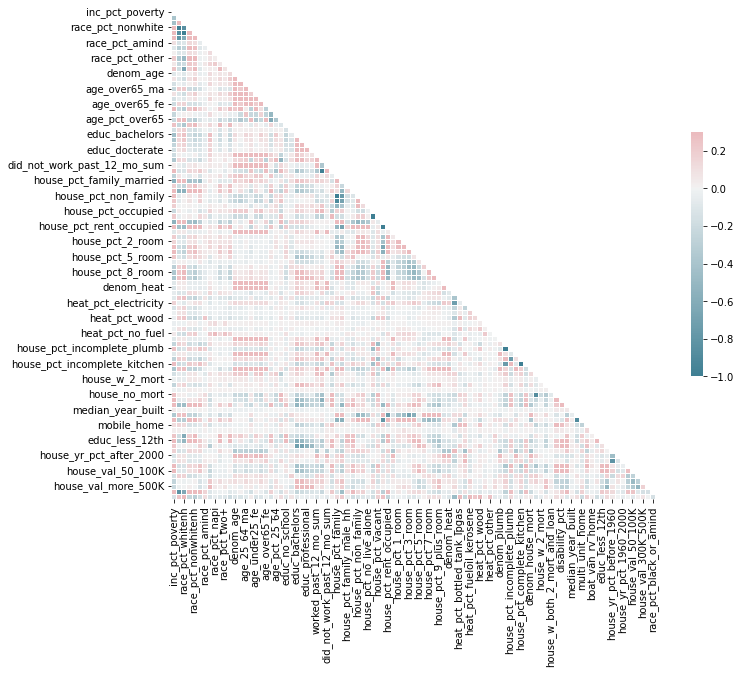

In [8]:
#Find correlated features in ACS dataset and identify the highly correlated relationships

# Create ACS correlation matrix
corr = ACS.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
 
# Filtering out lower/upper triangular duplicates 
corr_high = corr[abs(corr) > 0.7].stack().reset_index()
corr_high = corr_high[corr_high['level_0'].astype(str)!=corr_high['level_1'].astype(str)]
corr_high['ordered-cols'] = corr_high.apply(lambda x: '-'.join(sorted([x['level_0'],x['level_1']])),axis=1)
corr_high = corr_high.drop_duplicates(['ordered-cols'])
corr_high.drop(['ordered-cols'], axis=1, inplace=True)
corr_high.columns = ['Pair Var 1', 'Pair Var 2', 'Corr Value']

# Display highly correlated pairs
print(corr_high.sort_values(by=['Corr Value'], ascending=False))




#From highly correlated pairs, remove one of the Pair Vars from the ACS dataset except for the 'mort' variables
#ACS = ACS.drop(['house_pct_vacant', 'did_not_work_past_12_mo', 'house_pct_non_family', 'house_pct_rent_occupied',
#                           'race_pct_white', 'race_pct_nonwhitenh','race_pct_hisp', 'house_pct_incomplete_plumb',
#                           'house_pct_incomplete_kitchen', 'race_pct_whitenh','house_no_mort',
#                           'race_pct_black','house_pct_live_alone','house_pct_family_married','educ_bachelors',
#                           'heat_pct_electricity','house_pct_complete_kitchen','house_yr_pct_1960_2000'], axis=1) 





print (ACS.head())


In [9]:
#ACS['house_pct']

In [10]:
# Based on feature importance experiments, select features with consistence importance across annual predictions
ACS_reduced = ACS[['heat_pct_coal','heat_pct_solar','house_yr_pct_before_1960','educ_less_12th','heat_pct_wood',
                  'inc_pct_poverty','age_pct_over65','race_pct_nonwhite','house_val_100K_300K','educ_no_school',
                  'house_pct_ownd_occupied','heat_pct_utility_gas','house_w_home_equity_loan','house_val_less_50K',
                  'educ_high_school','house_pct_family','heat_pct_other','house_pct_family_female_hh']]



In [11]:
ACS_cols_to_use =[ 'did_not_work_past_12_mo',
               'house_pct_live_alone',
               'pct_alt_heat',
               'house_yr_pct_before_1960',
               'inc_pct_poverty',
               'race_pct_black_or_amind']
ACS_commonCols = ACS[ACS_cols_to_use]
ACS_justSmoke_Cols = [ 'did_not_work_past_12_mo',
               'house_pct_live_alone',
               'pct_alt_heat',
               'house_yr_pct_before_1960',
               'inc_pct_poverty',
               'race_pct_black_or_amind',
                'age_pct_over65',
                'house_val_less_50K']
ACS_justSmokeCols = ACS[ACS_justSmoke_Cols]

In [12]:
# smoke detector statistical model munging
#sm = pd.read_csv(  data_path /'Model Outputs'/'SmokeAlarmModelOutput.csv')
sm = pd.read_csv(  data_path /'Model Outputs'/'SmokeAlarmModelMultiLevel.csv')
print(np.unique(sm.geography))
sm


['block_group' 'county' 'state' 'tract']


,geoid,num_surveys,detectors_found_total,detectors_found_prc,detectors_found_CI,detectors_working_total,detectors_working_prc,detectors_working_CI,geography
0,#_010139534001,39,18.0,46.15,15.645969,12.0,30.77,14.485540,block_group
1,#_010139534002,48,19.0,39.58,13.834508,8.0,16.67,10.543965,block_group
2,#_010730023034,44,34.0,77.27,12.383258,19.0,43.18,14.635975,block_group
3,#_010730035002,32,18.0,56.25,17.188239,8.0,25.00,15.003125,block_group
4,#_010730035003,34,23.0,67.65,15.724891,11.0,32.35,15.724891,block_group
...,...,...,...,...,...,...,...,...,...
213734,#_560459511001,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state
213735,#_560459511002,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state
213736,#_560459513001,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state
213737,#_560459513002,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state


In [13]:
sm['geoid'] = sm['geoid'].str[2:]
sm['tract'] = sm['geoid'].str[:-1]
sm.set_index('geoid', inplace =  True)
sm_all = sm.copy()
#sm_all = sm[ sm['geography'].isin(['county','state']) ]

sm = sm[ sm['geography'].isin(['tract','block_group']) ]

sm_all

,num_surveys,detectors_found_total,detectors_found_prc,detectors_found_CI,detectors_working_total,detectors_working_prc,detectors_working_CI,geography,tract
geoid,,,,,,,,,
010139534001,39,18.0,46.15,15.645969,12.0,30.77,14.485540,block_group,01013953400
010139534002,48,19.0,39.58,13.834508,8.0,16.67,10.543965,block_group,01013953400
010730023034,44,34.0,77.27,12.383258,19.0,43.18,14.635975,block_group,01073002303
010730035002,32,18.0,56.25,17.188239,8.0,25.00,15.003125,block_group,01073003500
010730035003,34,23.0,67.65,15.724891,11.0,32.35,15.724891,block_group,01073003500
...,...,...,...,...,...,...,...,...,...
560459511001,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state,56045951100
560459511002,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state,56045951100
560459513001,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state,56045951300


In [14]:
sm

,num_surveys,detectors_found_total,detectors_found_prc,detectors_found_CI,detectors_working_total,detectors_working_prc,detectors_working_CI,geography,tract
geoid,,,,,,,,,
010139534001,39,18.0,46.15,15.645969,12.0,30.77,14.485540,block_group,01013953400
010139534002,48,19.0,39.58,13.834508,8.0,16.67,10.543965,block_group,01013953400
010730023034,44,34.0,77.27,12.383258,19.0,43.18,14.635975,block_group,01073002303
010730035002,32,18.0,56.25,17.188239,8.0,25.00,15.003125,block_group,01073003500
010730035003,34,23.0,67.65,15.724891,11.0,32.35,15.724891,block_group,01073003500
...,...,...,...,...,...,...,...,...,...
560210004012,56,26.0,46.43,13.062377,16.0,28.57,11.831982,tract,56021000401
560210004013,56,26.0,46.43,13.062377,16.0,28.57,11.831982,tract,56021000401
560210004014,56,26.0,46.43,13.062377,16.0,28.57,11.831982,tract,56021000401


In [15]:
def create_rurality_data(sm,subset_county = False): 
    #Rurality Data Munging 
    rd = pd.read_csv( data_path / 'Master Project Data' /'Tract Rurality Data.csv', dtype = {'Tract':'object'},encoding = 'latin-1' )
    rd['Population Density (per square mile), 2010'] =  rd['Population Density (per square mile), 2010'].str.replace(',','').astype('float')
    rd = rd.iloc[:,[0,2,4,6,8]]
    block_tract = sm['tract'].to_frame()
    block_tract = block_tract.reset_index()
    rd = block_tract.merge(rd, how = 'left', left_on = 'tract' , right_on ='Tract')
    rd.set_index('geoid',inplace= True)
    rd = rd.iloc[:,2:]
    rd['Select State'] = rd['Select State'].astype('category')

    # add state level model estimates 
    sms = pd.rd = pd.read_csv( data_path /'Model Outputs'/'Smoke_Alarm_Single_Level'/ 'SmokeAlarmModelState.csv')
    sms['geoid'] = sms['geoid'].str[2:]
    sms =  sms.loc[:,['geoid','detectors_found_prc']]
    sms = sms.rename(columns= {'geoid':'state_geoid'}  )

    rd['state_geoid'] = rd.index.str[:2]
    rd = rd.reset_index()
    rd = rd.merge(sms,how = 'left', on = 'state_geoid' )
    rd.drop('state_geoid',axis = 1,inplace = True)
    rd = rd.rename(columns = {'detectors_found_prc':'state_detectors_found_prc'}) 
    rd = rd.set_index('geoid')


    # add county level estimates
    smc = pd.read_csv( data_path /'Model Outputs'/'Smoke_Alarm_Single_Level'/ 'SmokeAlarmModelCounty.csv')
    smc['geoid'] = smc['geoid'].str[2:]
    if subset_county:
        smc.iloc[0::2,:] = np.nan
    smc =  smc.loc[:,['geoid','detectors_found_prc']]
    smc = smc.rename(columns= {'geoid':'county_geoid'}  )

    rd['county_geoid'] = rd.index.str[:5]
    rd = rd.reset_index()
    rd = rd.merge(smc,how = 'left', on = 'county_geoid' )
    rd.drop('county_geoid',axis = 1,inplace = True)
    rd = rd.rename(columns = {'detectors_found_prc':'county_detectors_found_prc'}) 
    rd = rd.set_index('geoid')
  #  rd['RUCA_rurality_index'] = rd['Primary RUCA Code 2010']
  #  rd[rd['RUCA_rurality_index'] > 10 ] = np.NaN
    rd = rd.iloc[:,3:]

    return rd 

# alternative 1 hot based encoding
#rd = rd.merge( pd.get_dummies(rd['Select State']), how = 'left', on= 'geoid')


In [16]:
rd = create_rurality_data(sm,True)
rd_all = create_rurality_data(sm_all)

In [17]:
rd

,"Population Density (per square mile), 2010",state_detectors_found_prc,county_detectors_found_prc
geoid,,,
010139534001,NaN,58.37,NaN
010139534002,NaN,58.37,NaN
010730023034,NaN,58.37,NaN
010730035002,NaN,58.37,NaN
010730035003,NaN,58.37,NaN
...,...,...,...
560210004012,NaN,63.00,55.44
560210004013,NaN,63.00,55.44
560210004014,NaN,63.00,55.44


In [18]:
def train_model(X = rd, ACS = pd.DataFrame(), y= sm, predict ='Presence', modeltype='XGBoost'):
    from scipy.stats import zscore, pearsonr
    from sklearn.metrics import auc, accuracy_score, confusion_matrix,mean_squared_error,mean_absolute_error,roc_auc_score, r2_score

    assert(predict in ['Presence', 'Working']) 
   
    
    # Define model types & parameters 
    
    if modeltype =='LinearRegression':
        from sklearn.linear_model import LinearRegression
        model = LinearRegression()
    if modeltype =='ElasticNet':    
        from sklearn.linear_model import ElasticNet
        model = ElasticNet()
    if modeltype =='Ridge':    
        from sklearn.linear_model import Ridge
        model = Ridge()
    if modeltype =='Lasso':    
        from sklearn.linear_model import Lasso
        model = Lasso()       
        
       
        
    elif modeltype =='XGBoost':
        model = xgb.XGBRegressor(objective = 'reg:squarederror',random_state = 0)
            
  
    if  predict == 'Presence':
        y = y['detectors_found_prc']
    elif predict =='Working':
        y = y['detectors_working_prc']


    # merge in ACS Data into X unless NFIRS-Only model
    if not ACS.empty:
        X = X.merge(ACS, how ='left',left_index = True, right_index = True)
        print(X.size)
        print(y.size)
        #X = X[X.index.isin(y.index)]
        #y = y[y.index.isin(X.index)]
        print(X.size)
        print(y.size)
        y = y.filter(X.index)
    
    # Create 80/20 training/testing set split
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .2 )

    # Perform cross-validation 

    #scaler = preprocessing.StandardScaler().fit(X)
    #scaler.transform(X)
    #print ('Cross Val Score:')
    #print(cross_val_score(model, X, y))

    # Standardize features by removing the mean and scaling to unit variance
    
    #scaler = preprocessing.StandardScaler().fit(X_train)
    #X_columns = X_train.columns
    #X_train =  pd.DataFrame(scaler.transform(X_train), columns = X_columns )
    #X_test  =  pd.DataFrame(scaler.transform(X_test) , columns = X_columns )

    # Fit model to training set

    model = model.fit(X_train,y_train)

    # Calculate training set performance
    train_predictions = model.predict(X_train)
    print('-----Training_Performance------')
    print(mean_squared_error(y_train, train_predictions))
    print ('Test RMSE: {}'.format(mean_squared_error(y_train, train_predictions, squared = False)) )
    print ('Test MAE: {}'.format(mean_absolute_error(y_train, train_predictions)) )
    sns.scatterplot(y_train,train_predictions) 
    plt.show()
    
    # Calculate test set performance
    test_predictions = model.predict(X_test)
    print ('-----Test Performance ----- ')
    print ('Test RMSE: {}'.format(mean_squared_error(y_test, test_predictions, squared = False)) )
    print ('Test MAE: {}'.format(mean_absolute_error(y_test, test_predictions)) )
    sns.scatterplot(y_test,test_predictions) 
    plt.show()
    print ('Test Correlation: {}'.format(pearsonr(y_test, test_predictions)) )
    print ('Test R-squared: {}'.format(r2_score(y_test, test_predictions)) )


    #Calculate feature importance for each model
    if modeltype == 'XGBoost':
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        print("\n Feature ranking:")
        for f in range(len(X_test.columns)):
            print("%d. %s (%f)" % (f + 1, X_test.columns[indices[f]], importances[indices[f]])) 


    return  model,X_test,y_test



In [19]:
def train_model_justACS(ACS = pd.DataFrame(), y= sm, predict ='Presence', modeltype='XGBoost'):
    from scipy.stats import zscore, pearsonr
    from sklearn.metrics import auc, accuracy_score, confusion_matrix,mean_squared_error,mean_absolute_error,roc_auc_score, r2_score

    assert(predict in ['Presence', 'Working']) 
   
    
    # Define model types & parameters 
    
    if modeltype =='LinearRegression':
        from sklearn.linear_model import LinearRegression
        model = LinearRegression()
    if modeltype =='ElasticNet':    
        from sklearn.linear_model import ElasticNet
        model = ElasticNet()
    if modeltype =='Ridge':    
        from sklearn.linear_model import Ridge
        model = Ridge()
    if modeltype =='Lasso':    
        from sklearn.linear_model import Lasso
        model = Lasso()       
        
       
        
    elif modeltype =='XGBoost':
        model = xgb.XGBRegressor(objective = 'reg:squarederror',random_state = 0)
            
  
    if  predict == 'Presence':
        y = y['detectors_found_prc']
    elif predict =='Working':
        y = y['detectors_working_prc']


    # merge in ACS Data into X unless NFIRS-Only model
    if not ACS.empty:
        X = ACS
        print(X.size)
        print(y.size)
        X = X[X.index.isin(y.index)]
        y = y[y.index.isin(X.index)]
        print(X.size)
        print(y.size)
        y = y.filter(X.index)
    
    # Create 80/20 training/testing set split
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .2 )

    # Perform cross-validation 

    #scaler = preprocessing.StandardScaler().fit(X)
    #scaler.transform(X)
    #print ('Cross Val Score:')
    #print(cross_val_score(model, X, y))

    # Standardize features by removing the mean and scaling to unit variance
    
    #scaler = preprocessing.StandardScaler().fit(X_train)
    #X_columns = X_train.columns
    #X_train =  pd.DataFrame(scaler.transform(X_train), columns = X_columns )
    #X_test  =  pd.DataFrame(scaler.transform(X_test) , columns = X_columns )

    # Fit model to training set

    model = model.fit(X_train,y_train)

    # Calculate training set performance
    train_predictions = model.predict(X_train)
    print('-----Training_Performance------')
    print(mean_squared_error(y_train, train_predictions))
    print ('Test RMSE: {}'.format(mean_squared_error(y_train, train_predictions, squared = False)) )
    print ('Test MAE: {}'.format(mean_absolute_error(y_train, train_predictions)) )
    sns.scatterplot(y_train,train_predictions) 
    plt.show()
    
    # Calculate test set performance
    test_predictions = model.predict(X_test)
    print ('-----Test Performance ----- ')
    print ('Test RMSE: {}'.format(mean_squared_error(y_test, test_predictions, squared = False)) )
    print ('Test MAE: {}'.format(mean_absolute_error(y_test, test_predictions)) )
    sns.scatterplot(y_test,test_predictions) 
    plt.show()
    print ('Test Correlation: {}'.format(pearsonr(y_test, test_predictions)) )
    print ('Test R-squared: {}'.format(r2_score(y_test, test_predictions)) )


    #Calculate feature importance for each model
    if modeltype == 'XGBoost':
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        print("\n Feature ranking:")
        for f in range(len(X_test.columns)):
            print("%d. %s (%f)" % (f + 1, X_test.columns[indices[f]], importances[indices[f]])) 


    return  model,X_test,y_test



1544400
15600
1544400
15600
-----Training_Performance------
69.62801924638728
Test RMSE: 8.344340551918245
Test MAE: 6.129614420998125


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


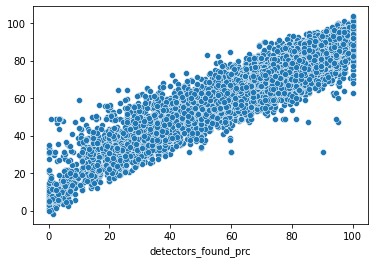

-----Test Performance ----- 
Test RMSE: 16.540505334327882
Test MAE: 12.451821828062718


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


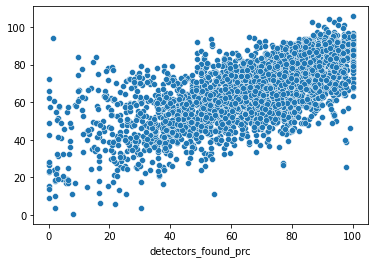

Test Correlation: (0.6678271291807523, 0.0)
Test R-squared: 0.4426511398114975

 Feature ranking:
1. county_detectors_found_prc (0.092926)
2. state_detectors_found_prc (0.044756)
3. house_val_less_50K (0.026036)
4. house_pct_complete_kitchen (0.025969)
5. heat_pct_coal (0.020247)
6. house_yr_pct_before_1960 (0.019894)
7. spanish_speaking (0.018361)
8. multi_unit_home (0.017743)
9. snap_past_12_mo (0.016951)
10. house_val_300K_500K (0.015791)
11. race_pct_whitenh (0.015540)
12. median_year_built (0.014814)
13. educ_less_12th (0.014586)
14. age_over65_fe (0.014377)
15. house_val_more_500K (0.014071)
16. house_val_100K_300K (0.013462)
17. denom_house_mort (0.013370)
18. boat_van_rv_home (0.013017)
19. heat_pct_electricity (0.012720)
20. educ_bachelors (0.012144)
21. heat_pct_fueloil_kerosene (0.012122)
22. house_val_50_100K (0.011983)
23. race_pct_black_or_amind (0.011924)
24. single_unit_home (0.011654)
25. worked_past_12_mo (0.011548)
26. pct_alt_heat (0.011153)
27. heat_pct_wood (0.011

In [20]:
mdl,X_test,y_test = train_model(X = rd, ACS = ACS, y = sm   ,modeltype= 'XGBoost')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


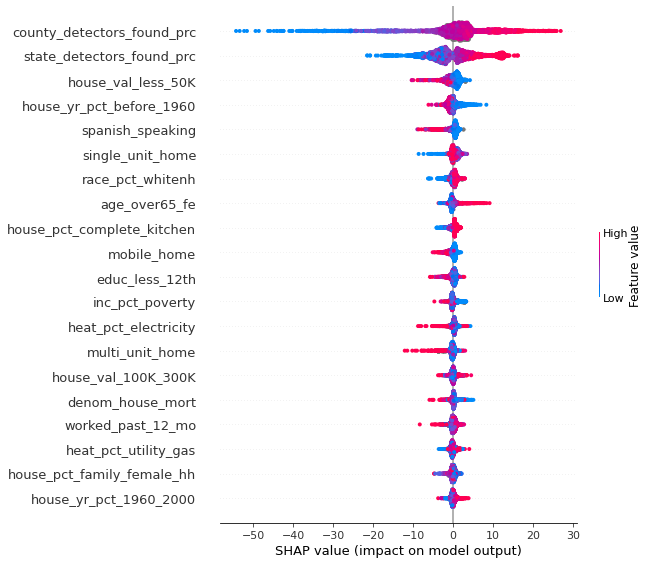

In [21]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
shap_values =shap.TreeExplainer(mdl).shap_values(X_test)
shap.summary_plot(shap_values,X_test)
plt.show()

20461824
15600
1488576
15506
-----Training_Performance------
85.88051576009751
Test RMSE: 9.267174097862709
Test MAE: 6.978720251933793


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


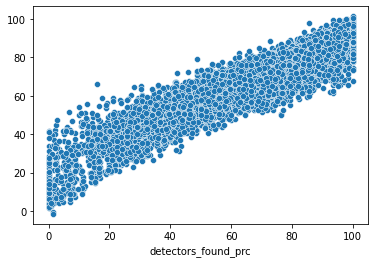

-----Test Performance ----- 
Test RMSE: 20.711998457793566
Test MAE: 16.113524812941858


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


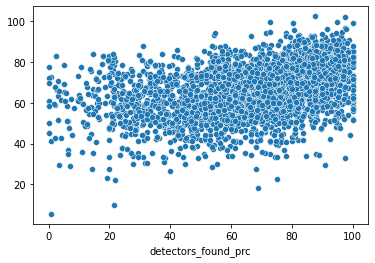

Test Correlation: (0.37549981564702006, 1.8624395830349315e-104)
Test R-squared: 0.10691905274345248

 Feature ranking:
1. house_val_less_50K (0.069605)
2. house_w_home_equity_loan (0.029243)
3. race_pct_whitenh (0.027826)
4. race_pct_black_or_amind (0.023628)
5. multi_unit_home (0.022671)
6. house_val_50_100K (0.022126)
7. house_pct_complete_kitchen (0.021276)
8. house_val_more_500K (0.020943)
9. single_unit_home (0.019421)
10. heat_pct_fueloil_kerosene (0.018709)
11. heat_pct_coal (0.016772)
12. educ_less_12th (0.016331)
13. pct_alt_heat (0.015110)
14. house_val_100K_300K (0.015038)
15. house_no_mort (0.014605)
16. heat_pct_no_fuel (0.013656)
17. house_yr_pct_1960_2000 (0.013137)
18. house_pct_complete_plumb (0.012975)
19. house_yr_pct_before_1960 (0.012970)
20. denom_heat (0.012930)
21. house_val_300K_500K (0.012895)
22. heat_pct_electricity (0.012766)
23. spanish_speaking (0.012602)
24. educ_bachelors (0.012570)
25. denom_house_mort (0.012080)
26. worked_past_12_mo (0.011625)
27. a

In [22]:
mdl_justACS,X_test,y_test = train_model_justACS(ACS = ACS, y = sm   ,modeltype= 'XGBoost')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


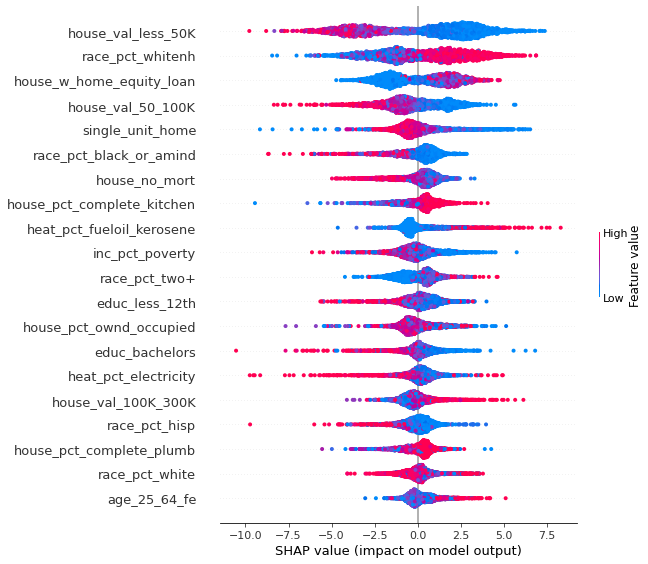

In [23]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
shap_values =shap.TreeExplainer(mdl_justACS).shap_values(X_test)
shap.summary_plot(shap_values,X_test)
plt.show()

327600
15600
327600
15600
-----Training_Performance------
104.57024392033196
Test RMSE: 10.225959315405667
Test MAE: 7.502844862117122


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


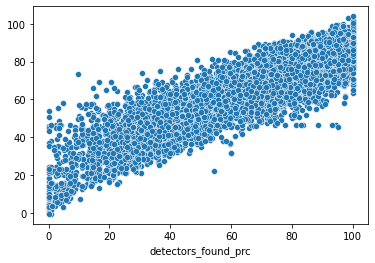

-----Test Performance ----- 
Test RMSE: 16.353379875993344
Test MAE: 12.285561355633615


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


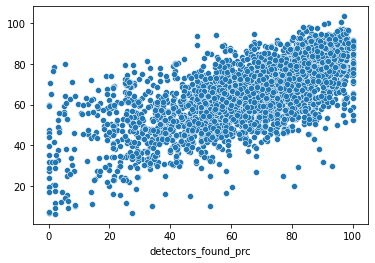

Test Correlation: (0.6720289026326707, 0.0)
Test R-squared: 0.44951113954767596

 Feature ranking:
1. county_detectors_found_prc (0.276216)
2. state_detectors_found_prc (0.117686)
3. heat_pct_coal (0.049696)
4. house_val_less_50K (0.047661)
5. race_pct_nonwhite (0.041334)
6. house_val_100K_300K (0.039702)
7. educ_less_12th (0.035578)
8. house_yr_pct_before_1960 (0.035091)
9. heat_pct_other (0.032681)
10. house_w_home_equity_loan (0.032562)
11. age_pct_over65 (0.031662)
12. inc_pct_poverty (0.031533)
13. educ_high_school (0.030837)
14. heat_pct_utility_gas (0.030721)
15. house_pct_ownd_occupied (0.030705)
16. educ_no_school (0.029361)
17. house_pct_family (0.028680)
18. heat_pct_wood (0.028077)
19. house_pct_family_female_hh (0.027380)
20. heat_pct_solar (0.022837)
21. Population Density (per square mile), 2010 (0.000000)


In [24]:
mdl2,X_test,y_test =train_model(X = rd, y = sm , ACS = ACS_reduced  ,modeltype= 'XGBoost')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


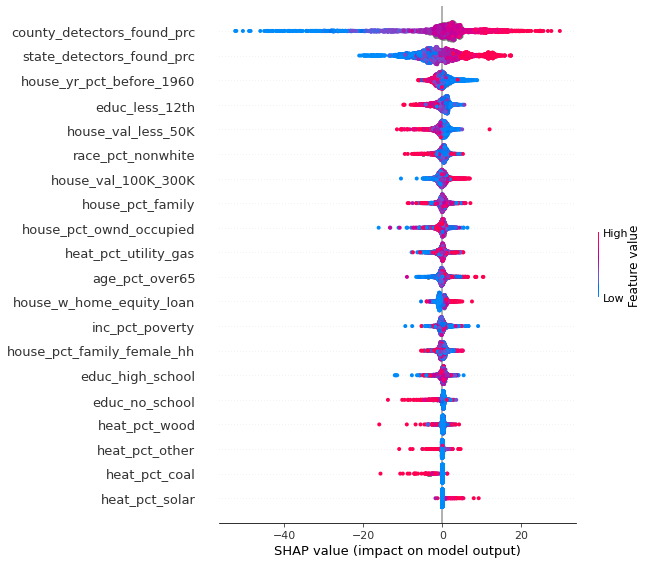

In [25]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
shap_values =shap.TreeExplainer(mdl2).shap_values(X_test)
shap.summary_plot(shap_values,X_test)
plt.show()

3836592
15600
279108
15506
-----Training_Performance------
155.04846298032197
Test RMSE: 12.451845766002805
Test MAE: 9.516257835813047


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


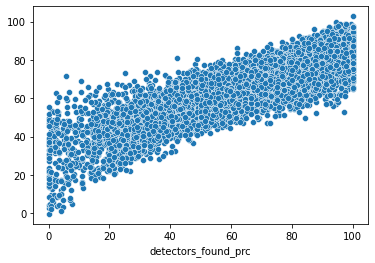

-----Test Performance ----- 
Test RMSE: 20.980758043373317
Test MAE: 16.415897276455034


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


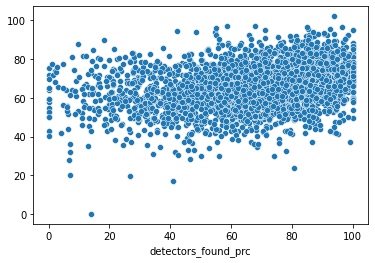

Test Correlation: (0.32205756243398276, 8.590657602246952e-76)
Test R-squared: 0.06472145774566851

 Feature ranking:
1. house_val_less_50K (0.138877)
2. house_w_home_equity_loan (0.089349)
3. house_val_100K_300K (0.071506)
4. race_pct_nonwhite (0.062563)
5. house_pct_ownd_occupied (0.054200)
6. heat_pct_utility_gas (0.053092)
7. educ_high_school (0.051686)
8. inc_pct_poverty (0.050290)
9. house_pct_family (0.049237)
10. house_pct_family_female_hh (0.049183)
11. age_pct_over65 (0.048395)
12. educ_less_12th (0.046994)
13. educ_no_school (0.044529)
14. heat_pct_coal (0.044274)
15. heat_pct_other (0.044236)
16. heat_pct_wood (0.039654)
17. house_yr_pct_before_1960 (0.036869)
18. heat_pct_solar (0.025064)


In [26]:
mdl2_justACS,X_test,y_test =train_model_justACS(ACS = ACS_reduced, y = sm   ,modeltype= 'XGBoost')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


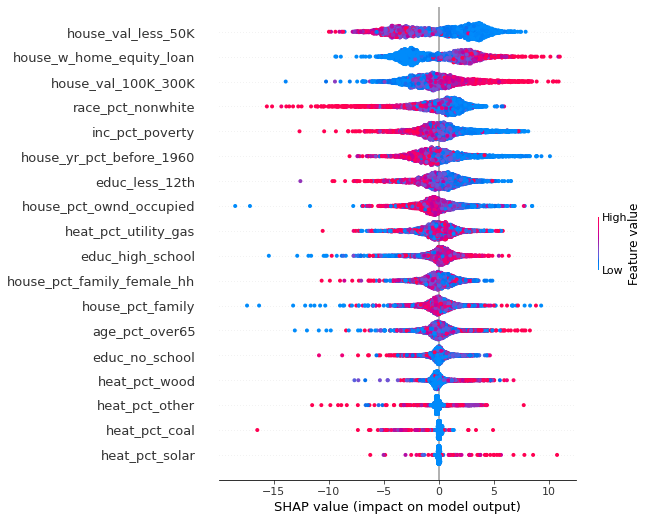

In [27]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
shap_values =shap.TreeExplainer(mdl2_justACS).shap_values(X_test)
shap.summary_plot(shap_values,X_test)
plt.show()

-----Training_Performance------
274.9413085601942
Test RMSE: 16.581354243854577
Test MAE: 12.180318040259086


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


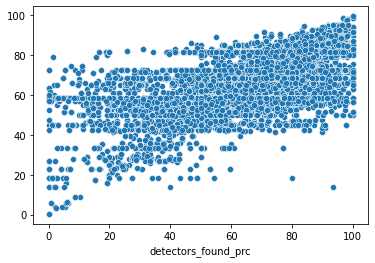

-----Test Performance ----- 
Test RMSE: 16.566343773685524
Test MAE: 12.109137606482857


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


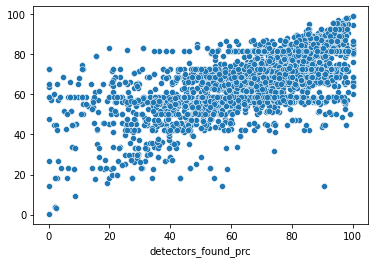

Test Correlation: (0.6576531616146742, 0.0)
Test R-squared: 0.43182944799535383

 Feature ranking:
1. county_detectors_found_prc (0.518072)
2. state_detectors_found_prc (0.481928)
3. Population Density (per square mile), 2010 (0.000000)


In [28]:
mdl3,X_test,y_test=train_model(X = rd, y = sm ,modeltype= 'XGBoost')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
All-NaN slice encountered


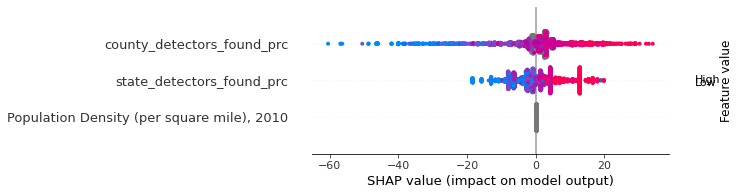

In [29]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
shap_values =shap.TreeExplainer(mdl3).shap_values(X_test)
shap.summary_plot(shap_values,X_test)
plt.show()

140400
15600
140400
15600
-----Training_Performance------
127.28450732123784
Test RMSE: 11.282043579123325
Test MAE: 8.286196087739453


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


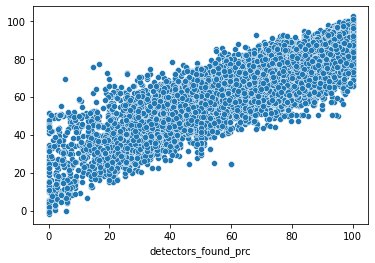

-----Test Performance ----- 
Test RMSE: 16.646322944222753
Test MAE: 12.356272562470192


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


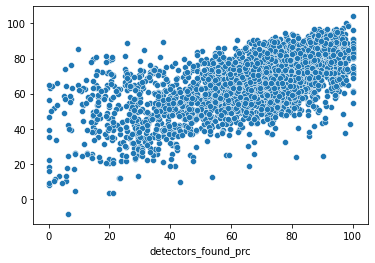

Test Correlation: (0.6580647557445396, 0.0)
Test R-squared: 0.429028680811274

 Feature ranking:
1. county_detectors_found_prc (0.420875)
2. state_detectors_found_prc (0.192821)
3. house_yr_pct_before_1960 (0.076511)
4. race_pct_black_or_amind (0.075691)
5. inc_pct_poverty (0.066039)
6. pct_alt_heat (0.060068)
7. house_pct_live_alone (0.054425)
8. did_not_work_past_12_mo (0.053569)
9. Population Density (per square mile), 2010 (0.000000)


In [30]:
mdl4,X_test,y_test =train_model(X = rd, y = sm , ACS = ACS_commonCols  ,modeltype= 'XGBoost')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
All-NaN slice encountered


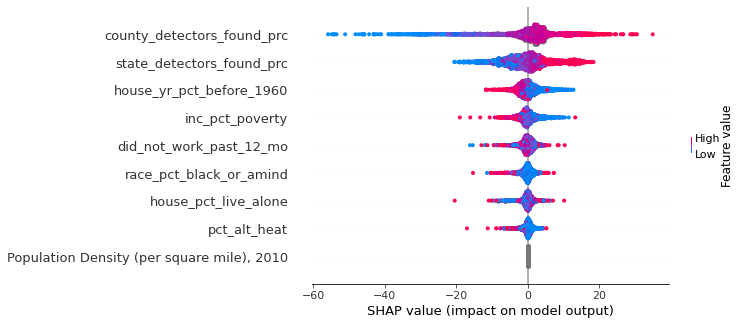

In [31]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
shap_values =shap.TreeExplainer(mdl4).shap_values(X_test)
shap.summary_plot(shap_values,X_test)
plt.show()

1278864
15600
93036
15506
-----Training_Performance------
223.80906515319177
Test RMSE: 14.960249501702563
Test MAE: 11.649047470353409


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


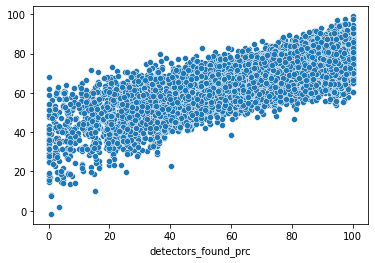

-----Test Performance ----- 
Test RMSE: 22.14944706145555
Test MAE: 17.287838043394892


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


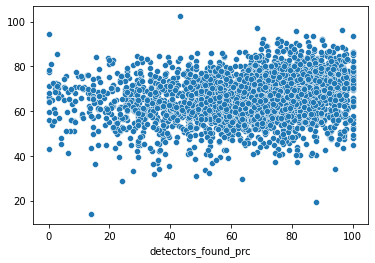

Test Correlation: (0.2254021568004126, 5.0213507919193746e-37)
Test R-squared: 0.0027345241754265226

 Feature ranking:
1. inc_pct_poverty (0.232507)
2. race_pct_black_or_amind (0.205983)
3. pct_alt_heat (0.165225)
4. house_yr_pct_before_1960 (0.149283)
5. house_pct_live_alone (0.133708)
6. did_not_work_past_12_mo (0.113294)


In [32]:
mdl4_justACS,X_test,y_test = train_model_justACS(ACS = ACS_commonCols, y = sm   ,modeltype= 'XGBoost')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


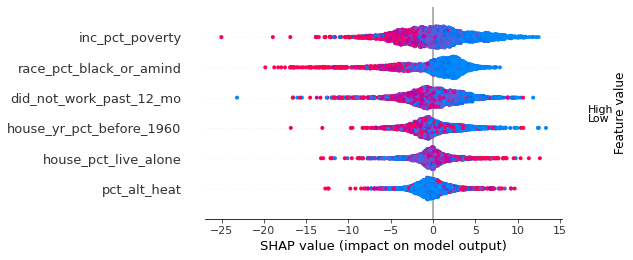

In [33]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
shap_values =shap.TreeExplainer(mdl4_justACS).shap_values(X_test)
shap.summary_plot(shap_values,X_test)
plt.show()

171600
15600
171600
15600
-----Training_Performance------
116.52063112331275
Test RMSE: 10.794472248484997
Test MAE: 7.911890439022667


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


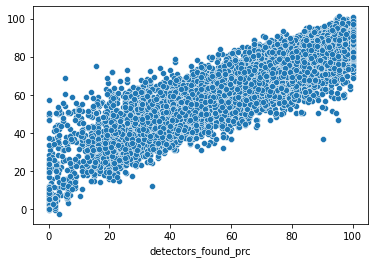

-----Test Performance ----- 
Test RMSE: 16.58080830546558
Test MAE: 12.35626505176532


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


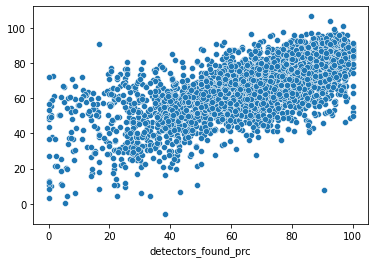

Test Correlation: (0.6697756129498138, 0.0)
Test R-squared: 0.4448121876299038

 Feature ranking:
1. county_detectors_found_prc (0.377524)
2. state_detectors_found_prc (0.178253)
3. house_val_less_50K (0.073522)
4. race_pct_black_or_amind (0.066054)
5. house_yr_pct_before_1960 (0.064102)
6. inc_pct_poverty (0.055532)
7. age_pct_over65 (0.050236)
8. pct_alt_heat (0.046864)
9. house_pct_live_alone (0.046117)
10. did_not_work_past_12_mo (0.041795)
11. Population Density (per square mile), 2010 (0.000000)


In [38]:
mdl5,X_test,y_test =train_model(X = rd, y = sm , ACS = ACS_justSmokeCols  ,modeltype= 'XGBoost')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
All-NaN slice encountered


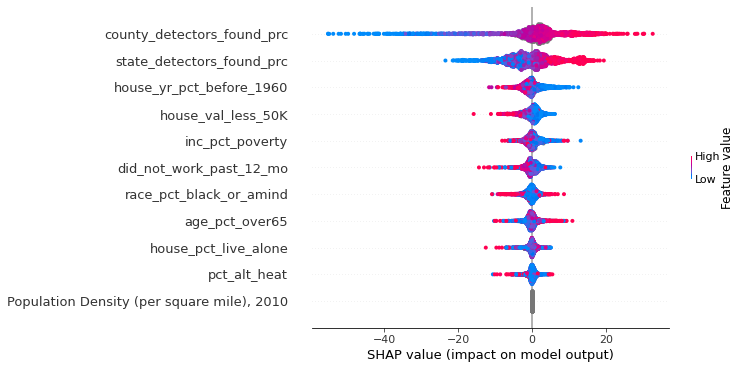

In [39]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
shap_values =shap.TreeExplainer(mdl5).shap_values(X_test)
shap.summary_plot(shap_values,X_test)
plt.show()

1705152
15600
124048
15506
-----Training_Performance------
199.272839377417
Test RMSE: 14.11640320256605
Test MAE: 10.853171257065098


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


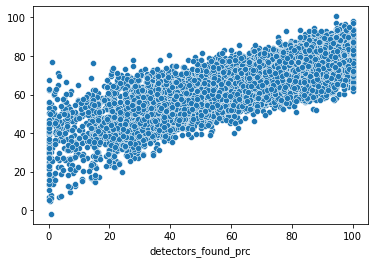

-----Test Performance ----- 


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


Test RMSE: 21.073376982580914
Test MAE: 16.410531315222467


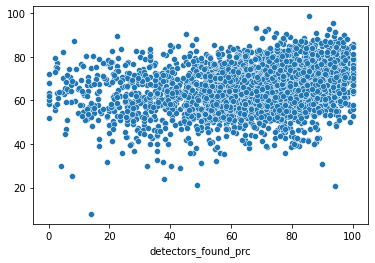

Test Correlation: (0.2894260024841907, 6.339539782717908e-61)
Test R-squared: 0.04496588299292881

 Feature ranking:
1. house_val_less_50K (0.253757)
2. race_pct_black_or_amind (0.143418)
3. inc_pct_poverty (0.113699)
4. age_pct_over65 (0.113371)
5. house_yr_pct_before_1960 (0.113153)
6. pct_alt_heat (0.105645)
7. house_pct_live_alone (0.090808)
8. did_not_work_past_12_mo (0.066149)


In [40]:
mdl5_justACS,X_test,y_test = train_model_justACS(ACS = ACS_justSmokeCols, y = sm   ,modeltype= 'XGBoost')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


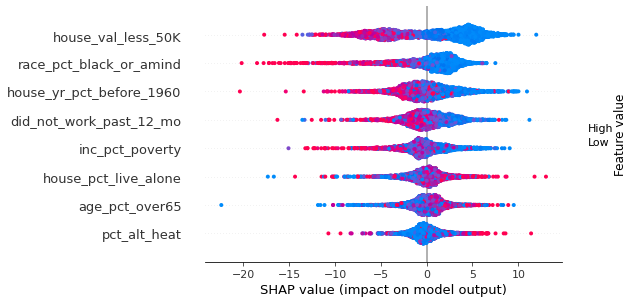

In [41]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
shap_values =shap.TreeExplainer(mdl5_justACS).shap_values(X_test)
shap.summary_plot(shap_values,X_test)
plt.show()

In [47]:
sm_all['rd_ACS_allCols'] =  mdl.predict(rd_all.merge(ACS,how = 'left', left_index = True, right_index = True) )
ACS_cols = ACS.columns
sm_all['ACS_allCols'] =  mdl_justACS.predict(rd_all.merge(ACS,how = 'left', left_index = True, right_index = True)[ACS_cols] )
sm_all['rd_ACS_reduced'] =  mdl2.predict(rd_all.merge(ACS_reduced,how = 'left', left_index = True, right_index = True) )

reduced_cols = ['heat_pct_coal','heat_pct_solar','house_yr_pct_before_1960','educ_less_12th','heat_pct_wood',
                  'inc_pct_poverty','age_pct_over65','race_pct_nonwhite','house_val_100K_300K','educ_no_school',
                  'house_pct_ownd_occupied','heat_pct_utility_gas','house_w_home_equity_loan','house_val_less_50K',
                  'educ_high_school','house_pct_family','heat_pct_other','house_pct_family_female_hh']
sm_all['ACS_reduced'] =  mdl2_justACS.predict(rd_all.merge(ACS_reduced,how = 'left', left_index = True, right_index = True)[reduced_cols] )
sm_all['No_ACS_Predictions'] =  mdl3.predict(rd_all )
sm_all['rd_ACS_commonCols'] =  mdl4.predict(rd_all.merge(ACS_commonCols,how = 'left', left_index = True, right_index = True) )
sm_all['ACS_commonCols'] =  mdl4_justACS.predict(rd_all.merge(ACS_commonCols,how = 'left', left_index = True, right_index = True)[ACS_cols_to_use] )
sm_all['rd_ACS_colsForSmoke'] =  mdl5.predict(rd_all.merge(ACS_justSmokeCols,how = 'left', left_index = True, right_index = True) )
sm_all['ACS_colsForSmoke'] =  mdl5_justACS.predict(rd_all.merge(ACS_justSmokeCols,how = 'left', left_index = True, right_index = True)[ACS_justSmoke_Cols] )

#sm_all['Avg_Predictions']  = (sm_all['No_ACS_Predictions'] +sm_all['ACS_commonCols_Predictions']) /2 

In [48]:
sm_all.loc[:,['num_surveys','geography',
              'detectors_found_prc',
              'detectors_working_prc',
              'rd_ACS_allCols','ACS_allCols','ACS_reduced','No_ACS_Predictions','rd_ACS_commonCols','ACS_commonCols','rd_ACS_colsForSmoke','ACS_colsForSmoke'    ] ]
sm_all = sm_all.merge(rd_all['Population Density (per square mile), 2010'],how = 'left',left_index = True,right_index = True)
sm_all.index =  '#_' + sm_all.index 

In [49]:
sm_all.to_csv(path / 'Data' / 'Model Outputs' / 'SmokeAlarmPredictiveModel_USA_ACS.csv')

In [78]:
sm_all.columns

Index(['num_surveys', 'detectors_found_total', 'detectors_found_prc',
       'detectors_found_CI', 'detectors_working_total',
       'detectors_working_prc', 'detectors_working_CI', 'geography', 'tract',
       'Full_Predictions', 'ACS_commonCols_Predictions', 'No_ACS_Predictions',
       'Avg_Predictions', 'Population Density (per square mile), 2010'],
      dtype='object')

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='detectors_found_prc', ylabel='No_ACS_Predictions'>

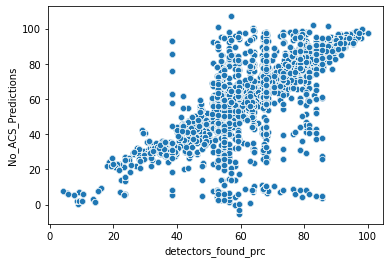

In [79]:
sns.scatterplot(sm_all['detectors_found_prc'],sm_all['No_ACS_Predictions'])

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='detectors_found_prc', ylabel='ACS_commonCols_Predictions'>

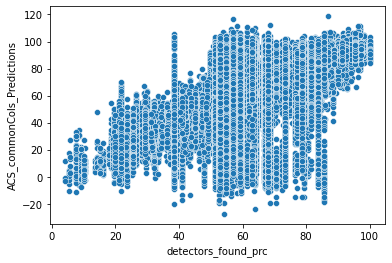

In [80]:
sns.scatterplot(sm_all['detectors_found_prc'],sm_all['ACS_commonCols_Predictions'])

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='detectors_found_prc', ylabel='Full_Predictions'>

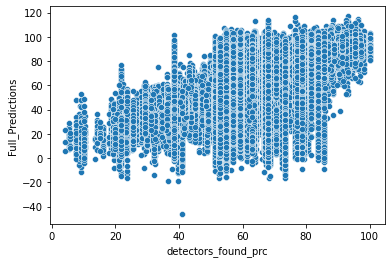

In [81]:
sns.scatterplot(sm_all['detectors_found_prc'],sm_all['Full_Predictions'])


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='detectors_found_prc', ylabel='Avg_Predictions'>

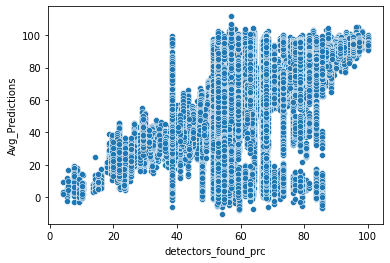

In [83]:
sns.scatterplot(sm_all['detectors_found_prc'],sm_all['Avg_Predictions'])


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='detectors_found_prc', ylabel='No_ACS_Predictions'>

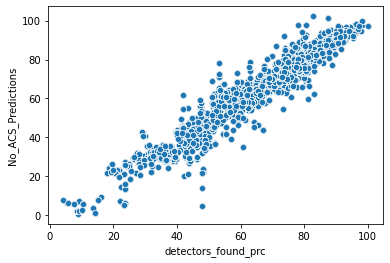

In [84]:
# plot of county predictions
sns.scatterplot(sm_all['detectors_found_prc'].where(sm_all['geography'] == 'county') ,sm_all['No_ACS_Predictions'].where(sm_all['geography'] == 'county' ) )


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='detectors_found_prc', ylabel='Avg_Predictions'>

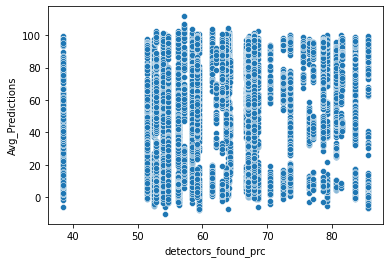

In [85]:
# plot of county predictions
sns.scatterplot(sm_all['detectors_found_prc'].where(sm_all['geography'] == 'state') ,sm_all['Avg_Predictions'].where(sm_all['geography'] == 'state' ) )